# Generate grafik pada MPS 
mencari nilai rata rata pressure dan velocity pada setiap file output

import library

In [6]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

Fungsi untuk mendapatkan data rata rata

In [7]:
# Fungsi menghitung rata-rata kolom
def calculate_average(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith('3'):
                values = line.split()
                # Mengambil data untuk wall, fluid = 0, wall = 2
                if values[0] == '2':
                        # Mengambil data pressure 
                        data.append(float(values[7]))
                        # Mengambil data velocity
                        #data.append(abs(float(values[4])))
                else:
                     pass
    return np.mean(data)

# Fungsi membaca tiap file dan memasukkan nilai rata rata menjadi 1 list
def calculate_file(file):
    data = []
    # Membaca semua file dalam format .prof
    file_list = [f for f in os.listdir(file) if f.endswith('.prof')]
    # Loop setiap file dan hitung rata-rata tiap file
    averages = {}
    for file_name in file_list:
        file_path = os.path.join(file, file_name)
        if os.path.exists(file_path):
                averages[file_name] = calculate_average(file_path)
    # Memasukkan nilai rata rata ke dalam 1 list
    for file_name, avg in averages.items():
        data.append(avg)
        #print(f'Rata-rata nilai kolom ke-8 pada file {file_name} adalah: {avg}')
        #print(len(a_800k))
    print(len(data))
    return data

File yang ingin di hitung

In [11]:
# File
upload_a = 'Salt_A/800K'
upload_b = 'Salt_B/800K'
upload_c = 'Salt_C/800K'
a_800k = calculate_file(upload_a)
b_800k = calculate_file(upload_b)
c_800k = calculate_file(upload_c)

2001
2001
2001


Membuat grafik

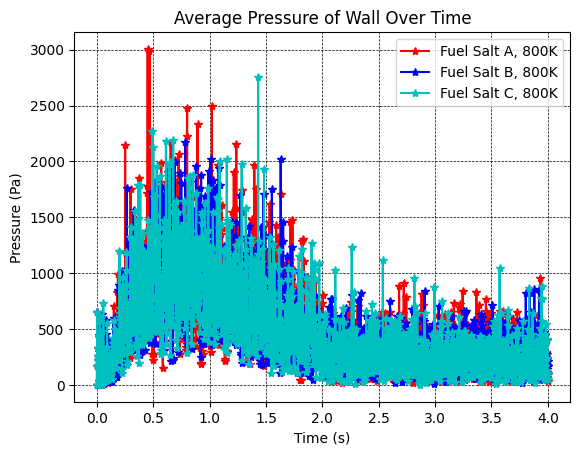

<Figure size 7680x5760 with 0 Axes>

In [12]:
# Waktu
time = np.linspace(0.0, 4.0, num = len(a_800k))

#salt A
a_800k = np.array(a_800k)
# Mengambil data setiap kelipatan 100
#a_800k = a_800k[::100]

#salt B
b_800k = np.array(b_800k)
#b_800k = b_800k[::100]

#salt C
c_800k = np.array(c_800k)
#c_800k = c_800k[::100]

#Grafik
fig, ax = plt.subplots()
ax.plot(time, a_800k, 'r', label='Fuel Salt A, 800K', ls='-', marker='*')
ax.plot(time, b_800k, 'b', label='Fuel Salt B, 800K', ls='-', marker='*')
ax.plot(time, c_800k, 'c', label='Fuel Salt C, 800K', ls='-', marker='*')
plt.title("Average Pressure of Wall Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.figure(dpi=1200) 
plt.show()